# Analysis and Understanding of Customer Churn Dataset, and Drawing Conclusions

## Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

## Importing Data

In [91]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer_Churn_Project\customer_churn_dataset-training-master.csv")

## Checking Basic Stats and Cleaning if Necessary

Viewing top 5 rows of the dataset

In [92]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Viewing information about the dataset

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Checking the shape of the data

In [94]:
data.shape

(440833, 12)

Removing Customer ID as it is not necessary for our analysis

In [95]:
data.drop(columns='CustomerID',inplace=True)

Renaming columns for easy usage

In [96]:
data.columns=data.columns.str.lower()

Checking is there any duplicated values

In [97]:
data.duplicated().sum()

np.int64(0)

Checking if there is any null value

In [98]:
data.isnull().sum()

age                  1
gender               1
tenure               1
usage frequency      1
support calls        1
payment delay        1
subscription type    1
contract length      1
total spend          1
last interaction     1
churn                1
dtype: int64

Checking the null valued columns

In [99]:
data[data.isnull().any(axis=1)]

,age,gender,tenure,usage frequency,support calls,payment delay,subscription type,contract length,total spend,last interaction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is only one null valued column, so its best to remove it

Removing the null valued column

In [100]:
data=data[~data.isnull().any(axis=1)]

Checking if there is any column that have only 1 unique value

In [101]:
data.nunique()

age                     48
gender                   2
tenure                  60
usage frequency         30
support calls           11
payment delay           31
subscription type        3
contract length          3
total spend          68363
last interaction        30
churn                    2
dtype: int64

There is no single uniqe valued column

Checking the target column

In [102]:
data['churn'].value_counts(normalize=True)*100

churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

As I can see, the target column is not biased to any class, there are kind of similary number of values

Checking the description of numerical columns

In [103]:
data.describe()

,age,tenure,usage frequency,support calls,payment delay,total spend,last interaction,churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Age column have normal values ranging from 18 to 65, means age value is spreaded ----

Tenure column have normal values ranging from 1 to 60, means from new to old, all customers are listed ----

Usage Frequency have normal values ranging from 1 to 30, means regular user and non regular users are included ----

Support calls column have normal values ranging from 0 to 10, means customers with no calls and customer with many calls both are included ----

Payment delay column have normal values ranging from 0 to 30, means all types of delays are included ----

Total spend also have normal values ranging from 100 to 1000 ----

Last interaction have also normal values ranging from 1 to 30 ----

### As I can see, values of the column are in proper format, so no need to do data cleaning...

## Univariate Analysis

Creation a function for easily create kde plot

In [104]:
def plot_kde(value,data=data):
    upper=data[value].max()
    lower=data[value].min()
    range_of_value=np.linspace(lower,upper,10)
    sns.kdeplot(data[value],color='cyan')
    plt.xticks(range_of_value)
    plt.xlim(lower-5,upper+5)
    plt.show()

Creation of a function to easily create a bar plot

In [105]:
def plot_bar(value,data=data):
    percent_values=(data[value].value_counts(normalize=True)*100)
    plt.figure(figsize=(8,5))
    plot=sns.barplot(percent_values,palette='pastel')
    plt.xticks(percent_values.index)
    for container in plot.containers:
        plot.bar_label(container,fmt="%.2f")
    plt.xlabel(value)
    plt.ylabel('Percentage of Values')
    plt.show()

### Age

In [106]:
data['age'].describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: age, dtype: float64

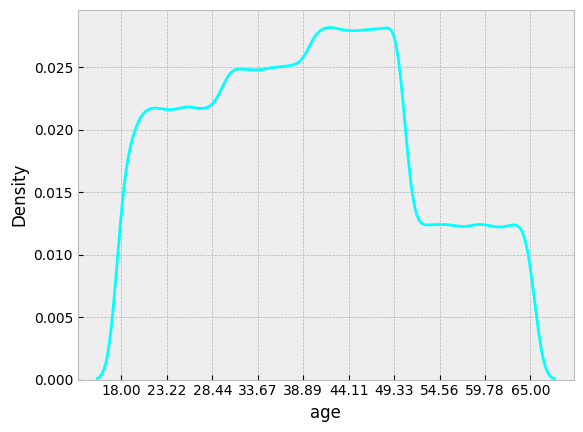

In [107]:
plot_kde('age')

<Axes: ylabel='age'>

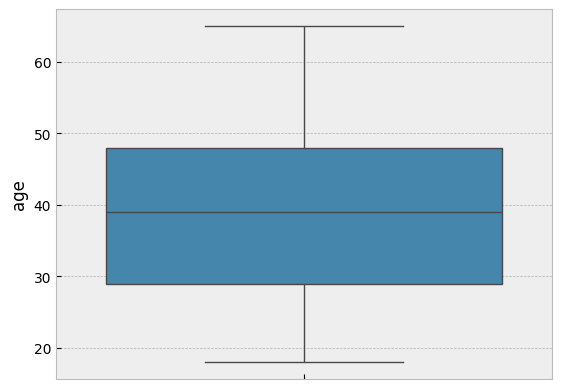

In [108]:
sns.boxplot(data['age'])

There are majority values in the middle age range, and lesser values in the uppper age range...so I can assume that the old aged people are less intrested in this service

### Gender

In [109]:
data['gender'].value_counts()

gender
Male      250252
Female    190580
Name: count, dtype: int64

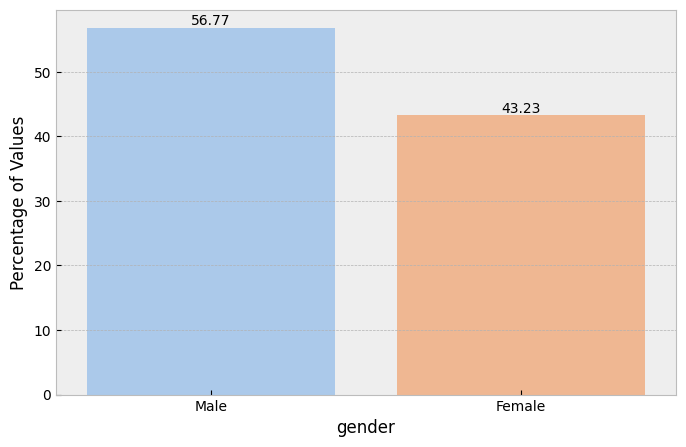

In [110]:
plot_bar('gender')

There are more data in male gender, maybe there are more samples of male, or maybe male are more interested...can not tell now

### Tenure

In [111]:
data['tenure'].describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: tenure, dtype: float64

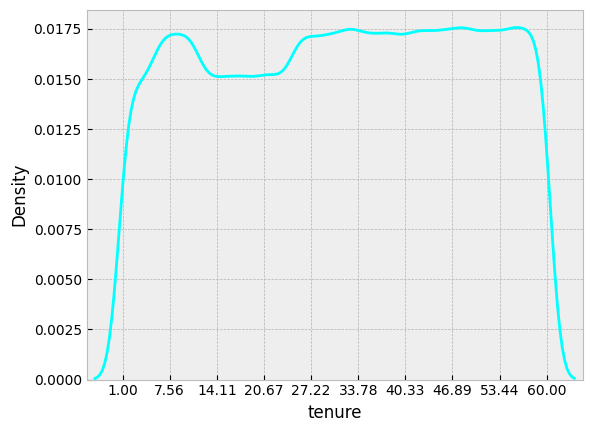

In [112]:
plot_kde('tenure')

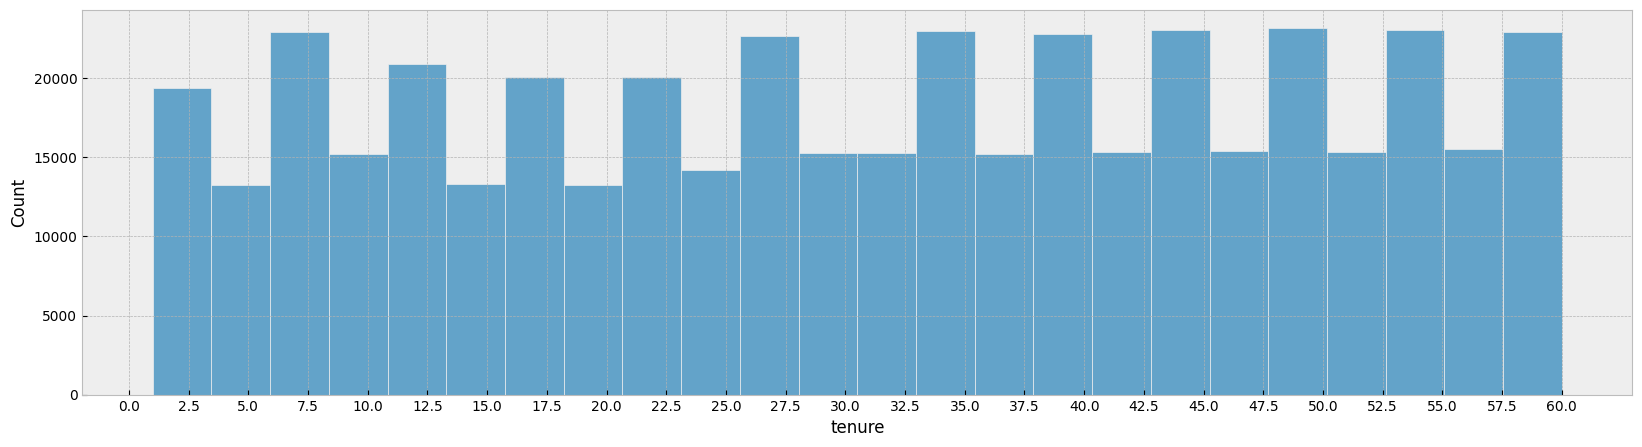

In [113]:
plt.figure(figsize=(20,5))
sns.histplot(data['tenure'], bins=np.linspace(1, 60, 25))  # 24 equal-width bins from 1 to 60
plt.xticks(np.arange(0,61,2.5))
plt.show()

<Axes: ylabel='tenure'>

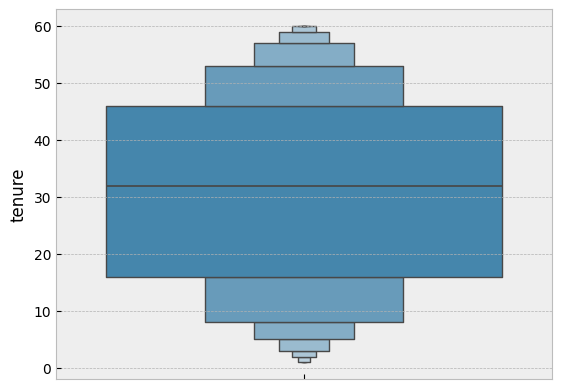

In [114]:
sns.boxenplot(data['tenure'])

There are also users that are joining new, as well as old users available

### Usage Frequency

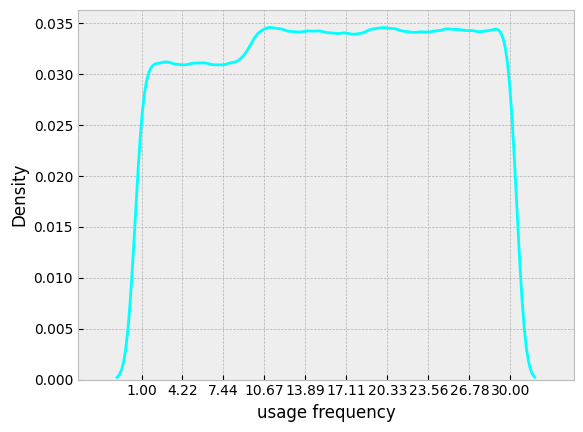

In [115]:
plot_kde('usage frequency')

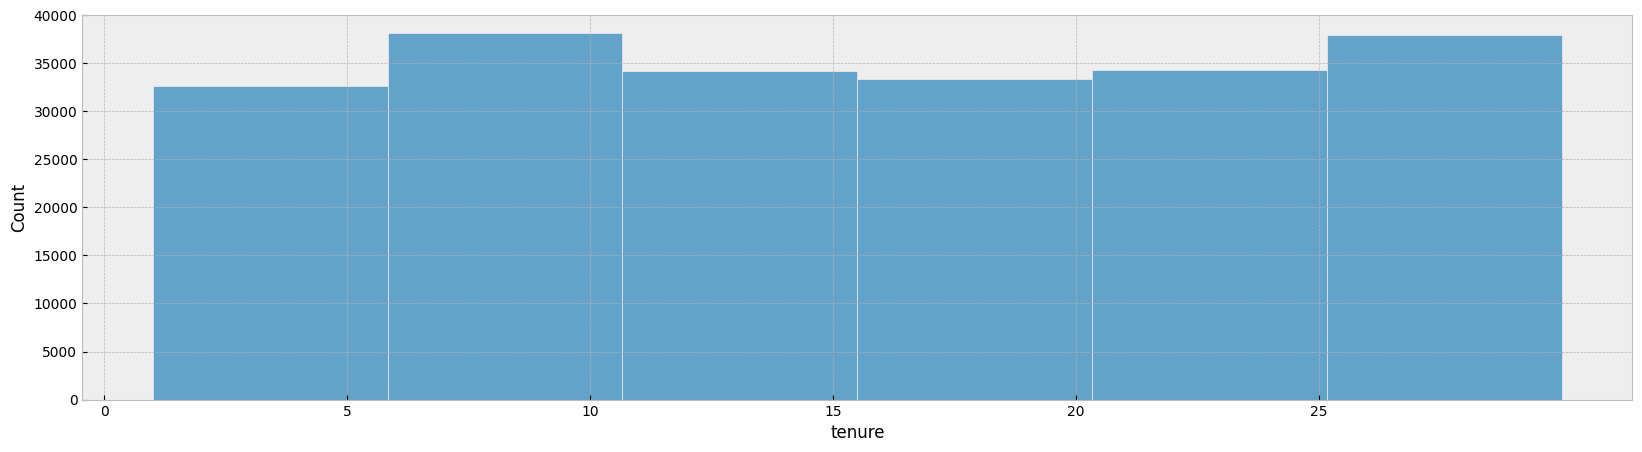

In [116]:
plt.figure(figsize=(20,5))
sns.histplot(data['tenure'], bins=np.linspace(1, 30, 7))  # 24 equal-width bins from 1 to 60
plt.xticks(np.arange(0,30,5))
plt.show()

<Axes: ylabel='usage frequency'>

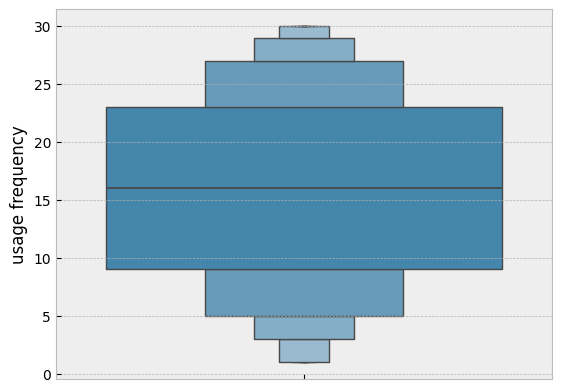

In [117]:
sns.boxenplot(data['usage frequency'])

Cant tell anything based on usage frequency

### Support Calls

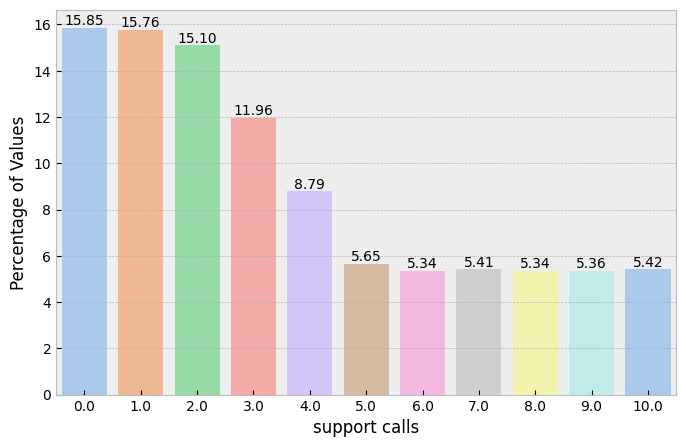

In [118]:
plot_bar('support calls')

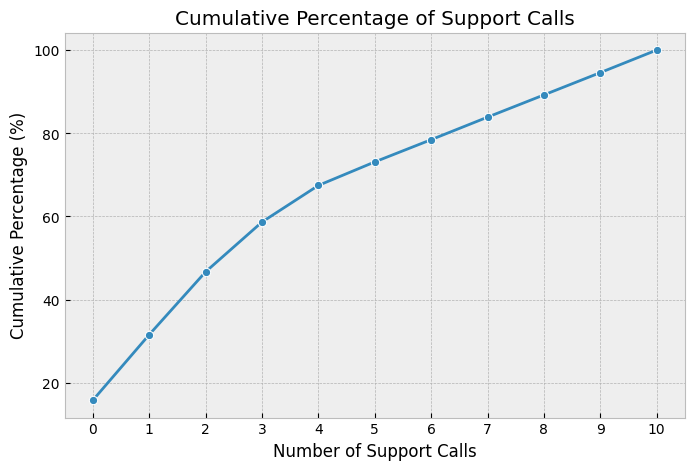

In [119]:
support_counts = data['support calls'].value_counts().sort_index()

# 2. Compute cumulative sum
cumsum = support_counts.cumsum()

# 3. Convert to percentage
percentage = cumsum / len(data) * 100

# 4. Plot cumulative percentage
plt.figure(figsize=(8,5))
sns.lineplot(x=percentage.index, y=percentage.values, marker='o')
plt.title("Cumulative Percentage of Support Calls")
plt.xlabel("Number of Support Calls")
plt.ylabel("Cumulative Percentage (%)")
plt.xticks(range(0, 11))  # From 0 to 10
plt.grid(True)
plt.show()

There are 70% of values with less than 5 support calls

There are lesser possibility high of support calls, so we can assume that the provider are good at service so that support calls are less

### Payment Delay

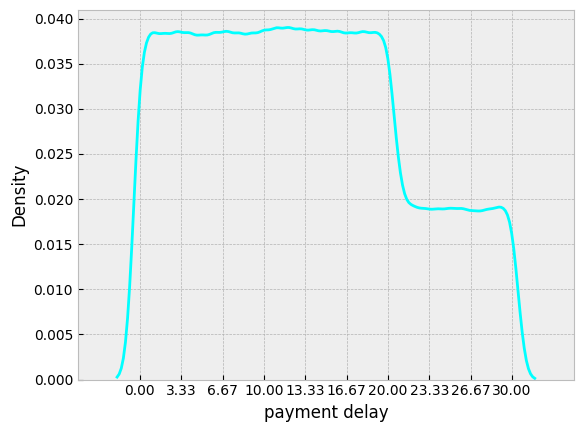

In [120]:
plot_kde('payment delay')

Most of the late payments are done within 20 days of due dates

### Subscription Type

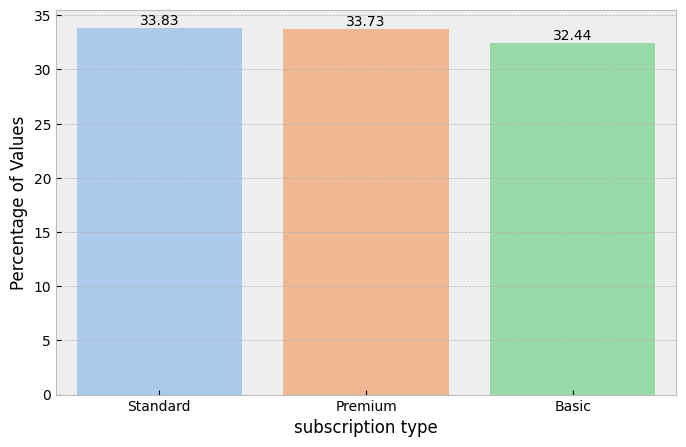

In [121]:
plot_bar('subscription type')

There are same kind of customer subscription usage of the service or product

### Contract Length

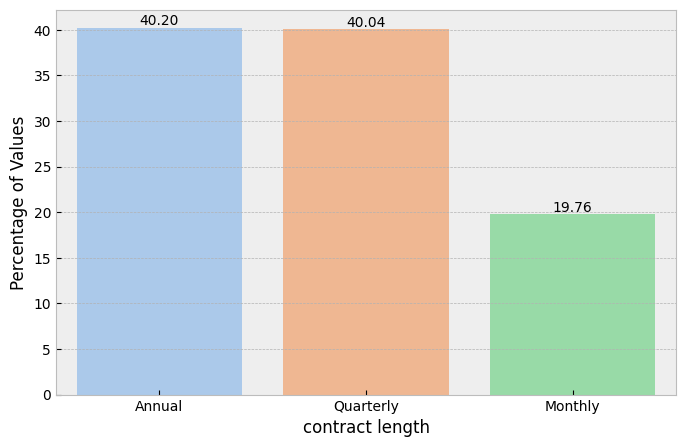

In [122]:
plot_bar('contract length')

<Axes: xlabel='contract length'>

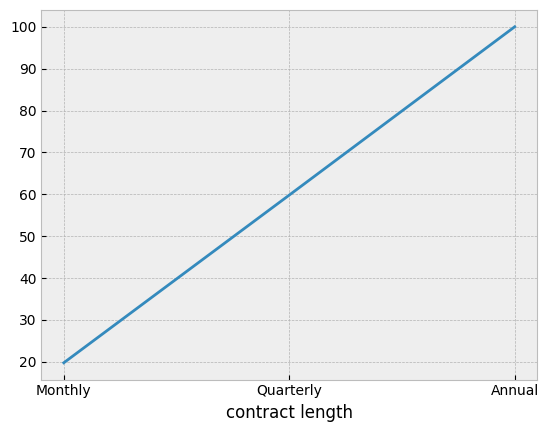

In [123]:
contract_len_count=data['contract length'].value_counts().sort_values(ascending=True)
cumsum=np.cumsum(contract_len_count)
percent_cumsum=cumsum/len(data)*100

sns.lineplot(y=percent_cumsum.values,x=percent_cumsum.index,markers='o')

People are using long term contract more over short term plans

### Total Spend

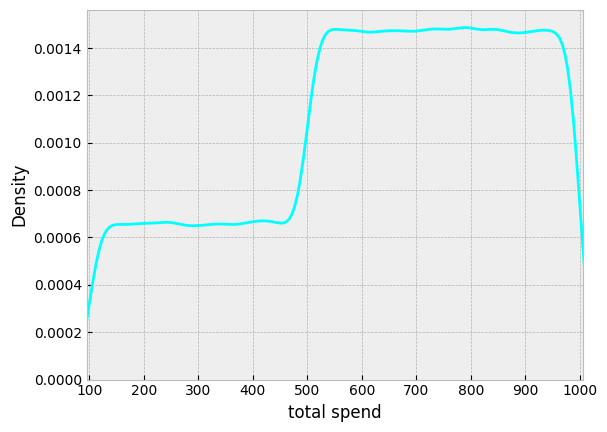

In [124]:
plot_kde('total spend')

There are lesser people who have less amount of total spend, I can assume that people are paying more for this service

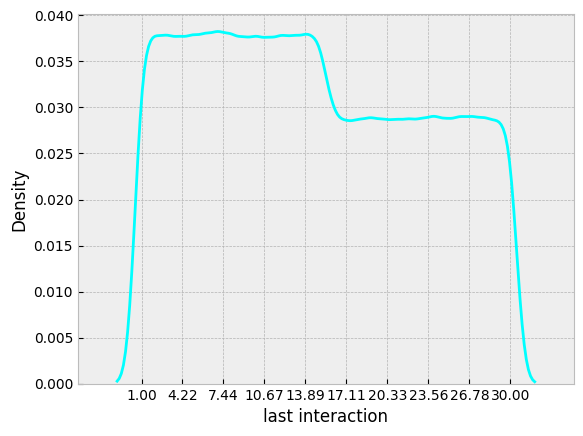

In [125]:
plot_kde('last interaction')

There are more people who have interacted within 15 days range

## Bivariate Analysis

### Importing statistical tests libraries

In [126]:
from scipy.stats import ttest_ind,chi2_contingency,levene

Creating a function which will do levenes test to check if the data have equal variance or not

In [127]:
def is_var_same(first_series,second_series):
    levene_test=levene(first_series,second_series)
    print(f"Levene’s p-value: {levene_test.pvalue:.5f}")
    if levene_test.pvalue<0.05:
        print('Not equal variance')
    else:
        print('Equal variance')

Creating a function for chi squared test

In [128]:
def chi_sqared_test(table):
    stats,p,dof,freq=chi2_contingency(table)
    print(f"p value is: {p:.5f}")
    if p<0.05:
        print('Reject the null, there is association in classes')
    else:
        print('There is no association in classes')

### Age vs Churn

In [129]:
data.groupby('churn')['age'].mean()

churn
0.0    36.262973
1.0    41.747263
Name: age, dtype: float64

Users who have churned have a higher mean age value

<Axes: xlabel='age', ylabel='Density'>

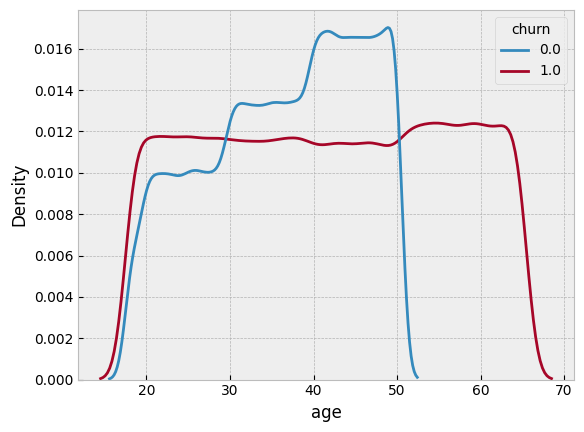

In [130]:
sns.kdeplot(x='age',hue='churn',data=data)

Middle aged people are more likely to stay and use the service, whereas old people are more likely to churn, it can support my previous analysis that stated "old aged people are less interested in this service"

Creating 2 series for churned people ages and not churned people ages to be used in 2 sample t-test

In [131]:
churned_age=data[data['churn']==1]['age'].sample(500,random_state=45)
not_churned_age=data[data['churn']==0]['age'].sample(500,random_state=45)

Null Hypothesis: Churned age mean = Not churned age mean

Alternate Hypothesis: Churned age mean != Not churned age mean

In [132]:
is_var_same(churned_age,not_churned_age)

Levene’s p-value: 0.00000
Not equal variance


levenes test says variance is not equal

Doing a 2 sample t test with false equal variance

In [133]:
stats,p=ttest_ind(np.array(churned_age),np.array(not_churned_age),equal_var=False)
print(f"p value is :{p:.5f}")
if p<0.05:
    print('Reject the null, Age groups are not similar')
else:
    print('Can not reject the null, Age groups are similar')

p value is :0.00000
Reject the null, Age groups are not similar


so, as we can see...we have strong evidence against the null hypothesis,so we can state that age group differs from 1 classes

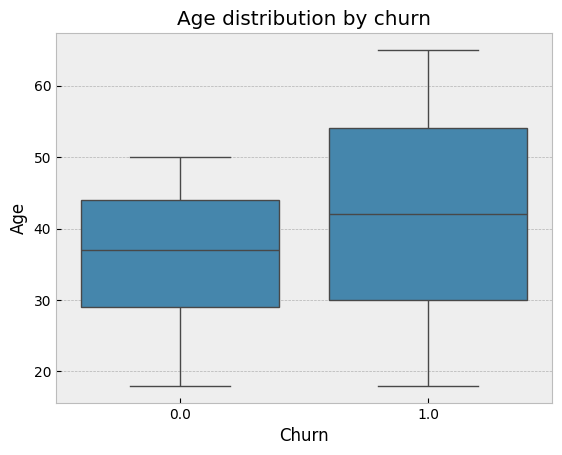

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='churn', y='age', data=data)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age distribution by churn')
plt.show()

### Gender vs Churn

Making a cross tab on gender vs churn to use in chi square test

Null Hypo : gender have no influence

Alternate Hypo : gender have influence

In [135]:
gender_churn_table=pd.crosstab(data['churn'],data['gender'])

Doing chi squared test

In [136]:
chi_sqared_test(gender_churn_table)

p value is: 0.00000
Reject the null, there is association in classes


so by chi squared test i can tell that there is association and influence of gender in churn

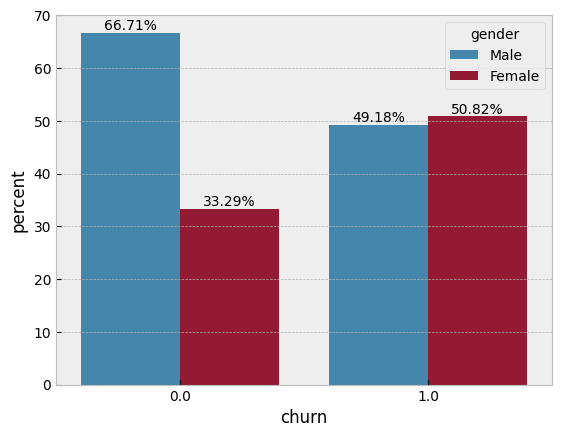

In [137]:
values = (data.groupby('churn')['gender'].value_counts(normalize=True) * 100).round(2).reset_index(name='percent')

# Create bar plot
fig, ax = plt.subplots()
sns.barplot(data=values, x='churn', y='percent', hue='gender', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

There are more chance of male gender not to churn whereas can not conclude anything right now about the female gender

### Tenure vs Churn

<Axes: xlabel='tenure', ylabel='Density'>

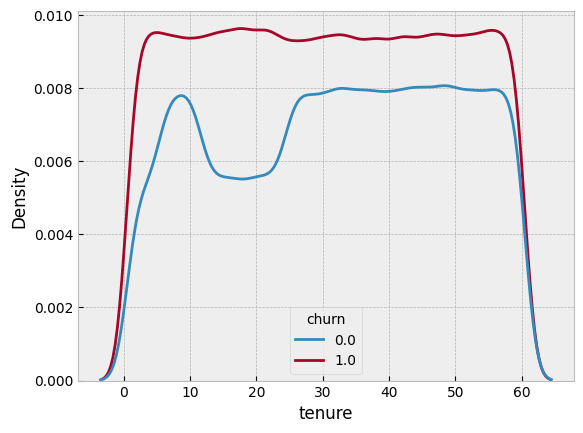

In [138]:
sns.kdeplot(x='tenure',hue='churn',data=data)

People with 1 or 1.5 years tenure have lesser chance of churning, maybe they have subscription of 1 year, and they must use it as we say that there were lesser number of users with monthly subscription

In [139]:
data[data['churn']==1]['tenure'].mean()

np.float64(30.473597894391578)

In [140]:
data[data['churn']==0]['tenure'].mean()

np.float64(32.281754203937474)

### Usage Frequency vs Churn

<Axes: xlabel='usage frequency', ylabel='Density'>

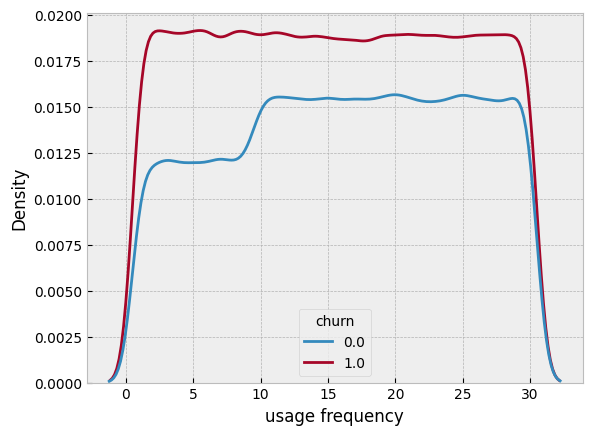

In [141]:
sns.kdeplot(x='usage frequency',hue='churn',data=data)

In [142]:
data[data['usage frequency']<10]['churn'].value_counts()/len(data[data['usage frequency']<10])*100

churn
1.0    61.367506
0.0    38.632494
Name: count, dtype: float64

In [143]:
(data[data['usage frequency']>10]['churn'].value_counts()/len(data[data['usage frequency']>10]))*100

churn
1.0    54.912899
0.0    45.087101
Name: count, dtype: float64

People using this service less than 10 times are more likely to churn

In [144]:
data.groupby('churn')['usage frequency'].mean()

churn
0.0    16.260552
1.0    15.461658
Name: usage frequency, dtype: float64

### Support Calls vs Churn

<Axes: xlabel='support calls', ylabel='Density'>

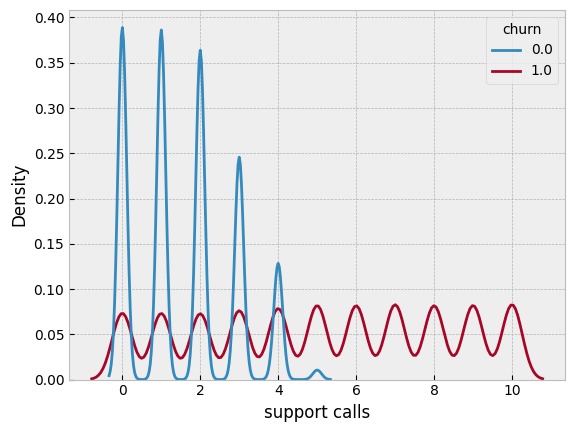

In [145]:
sns.kdeplot(x='support calls',hue='churn',data=data)

Getting the mean of support calls for both the churned and not churned classes

In [146]:
churned_call=data[data['churn']==1]['support calls'].sample(500,random_state=45)
not_churned_call=data[data['churn']==0]['support calls'].sample(500,random_state=45)

In [147]:
churned_call.mean()

np.float64(5.2)

In [148]:
not_churned_call.mean()

np.float64(1.57)

In [149]:
pd.crosstab(data['churn'],data['support calls'])

support calls,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
churn,,,,,,,,,,,
0.0,48715,48381,45567,30771,16082,1317,0,0,0,0,0
1.0,21160,21095,21004,21958,22668,23601,23554,23870,23559,23630,23900


Doing a chi squared test to get to know about the association between support calls and churn

Null Hypo : There is no association

Alternate Hypo : There is association

In [150]:
chi_sqared_test(pd.crosstab(data['churn'],data['support calls']))

p value is: 0.00000
Reject the null, there is association in classes


done chi squared test on support calls and get to know that there is association between those classes

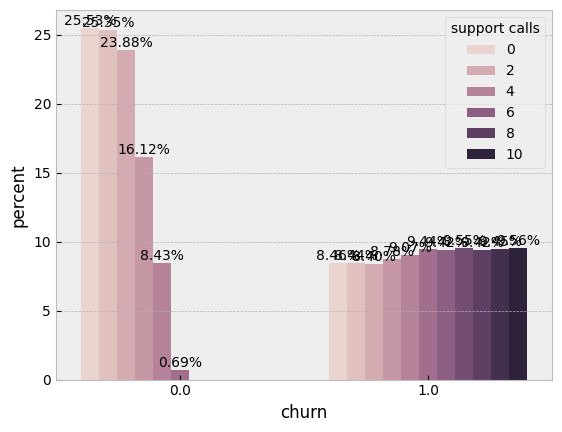

In [151]:
values = (data.groupby('churn')['support calls'].value_counts(normalize=True) * 100).round(2).reset_index(name='percent')

# Create bar plot
fig, ax = plt.subplots()
sns.barplot(data=values, x='churn', y='percent', hue='support calls', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

People calling 5 or more than 5 times are most probabily to churn

### Payment Delay vs Churn

<Axes: xlabel='payment delay', ylabel='Density'>

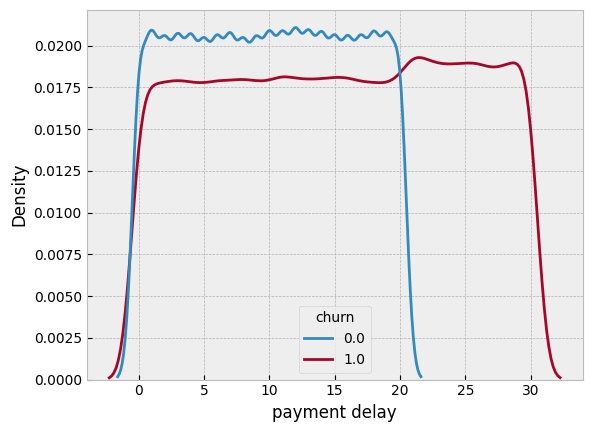

In [152]:
sns.kdeplot(x='payment delay',hue='churn',data=data)

Delay of payment more than 20 days means the user is most probably churned

In [154]:
data.groupby('churn')['payment delay'].mean()

churn
0.0    10.015500
1.0    15.217729
Name: payment delay, dtype: float64

Null Hypo : mean of payment delay in churn = mean of payment delay in not churn

Alternate Hypo : mean of payment delay in churn != mean of payment delay in not churn

In [155]:
churned_payment_delay=data[data['churn']==1]['payment delay'].sample(500,random_state=45)
not_churned_payment_delay=data[data['churn']==0]['payment delay'].sample(500,random_state=45)

In [156]:
is_var_same(churned_payment_delay,not_churned_payment_delay)

Levene’s p-value: 0.00000
Not equal variance


There is no equal variance so we have to do 2 sample t test with equal var = false

In [157]:
stats,p=ttest_ind(np.array(churned_payment_delay),np.array(not_churned_payment_delay),equal_var=False)
print(f"p value is {p: .5f}")
if p<0.05:
    print('reject the null, there is difference')
else:
    print('accept the null, there is no difference')

p value is  0.00000
reject the null, there is difference


so there is also difference in mean payment delay of churned and not churned

### Subscription Type vs Churn

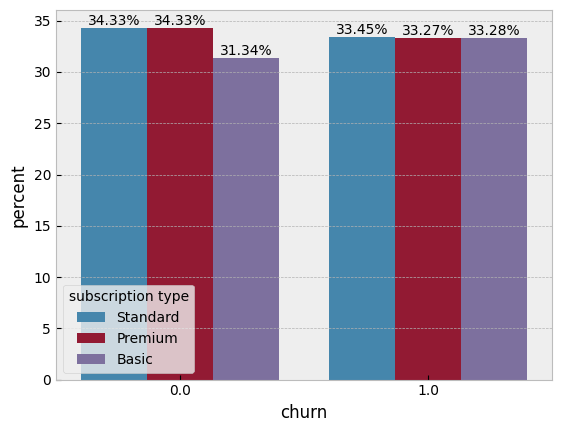

In [158]:
values = (data.groupby('churn')['subscription type'].value_counts(normalize=True) * 100).round(2).reset_index(name='percent')

# Create bar plot
fig, ax = plt.subplots()
sns.barplot(data=values, x='churn', y='percent', hue='subscription type', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

<Axes: xlabel='subscription type', ylabel='count'>

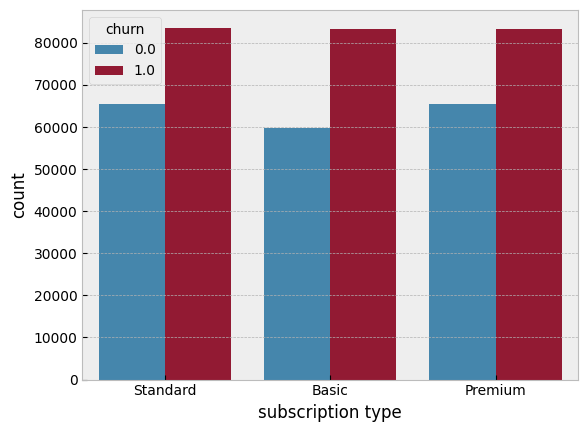

In [159]:
sns.countplot(x='subscription type',hue='churn',data=data)

Basic subscription user have slightly lower chance of continue using the service

In [160]:
pd.crosstab(data['subscription type'],data['churn'])

churn,0.0,1.0
subscription type,,
Basic,59816,83210
Premium,65505,83173
Standard,65512,83616


In [162]:
chi2_contingency(pd.crosstab(data['subscription type'],data['churn']))

Chi2ContingencyResult(statistic=np.float64(186.22514681615587), pvalue=np.float64(3.6452152042998097e-41), dof=2, expected_freq=array([[61914.92599902, 81111.07400098],
       [64361.63611988, 84316.36388012],
       [64556.4378811 , 84571.5621189 ]]))

In [161]:
chi_sqared_test(pd.crosstab(data['subscription type'],data['churn']))

p value is: 0.00000
Reject the null, there is association in classes


### Contract Length vs Churn

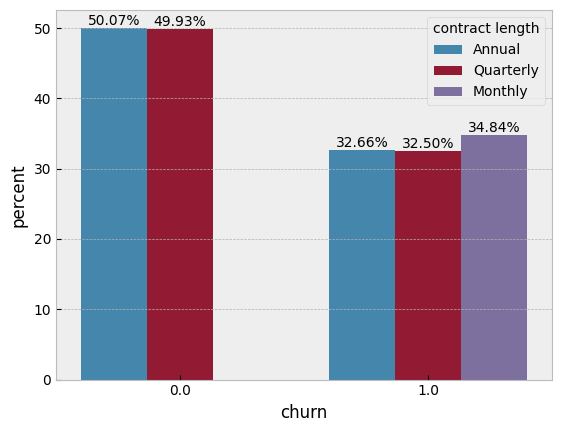

In [163]:
values = (data.groupby('churn')['contract length'].value_counts(normalize=True) * 100).round(2).reset_index(name='percent')

# Create bar plot
fig, ax = plt.subplots()
sns.barplot(data=values, x='churn', y='percent', hue='contract length', ax=ax)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

In [164]:
contract_length_churn_table=pd.crosstab(data['churn'],data['contract length'])
contract_length_churn_table

contract length,Annual,Monthly,Quarterly
churn,,,
0.0,95552,0,95281
1.0,81646,87104,81249


chi squared test on contract length and churn

In [165]:
chi_sqared_test(contract_length_churn_table)

p value is: 0.00000
Reject the null, there is association in classes


Monthly users are not likely to continue using the service

### Total Spend vs Churn

<Axes: xlabel='total spend', ylabel='Density'>

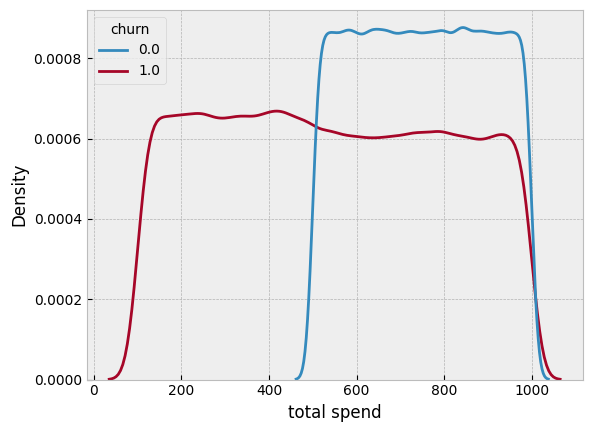

In [166]:
sns.kdeplot(x='total spend',hue='churn',data=data)

In [167]:
churned_total_spend=data[data['churn']==1]['total spend'].sample(500,random_state=45)
not_churned_total_spend=data[data['churn']==0]['total spend'].sample(500,random_state=45)

In [168]:
is_var_same(churned_total_spend,not_churned_total_spend)

Levene’s p-value: 0.00000
Not equal variance


Null Hypo : mean total spend in churn = mean total spend in not churn

Alternate Hypo : mean total spend in churn != mean total spend in not churn

In [169]:
stats,p=ttest_ind(np.array(churned_total_spend),np.array(not_churned_total_spend),equal_var=False)
print(f"{p:.5f}")
if p<0.05:
    print('There is difference')
else:
    print('There is no difference')

0.00000
There is difference


It shows people spending more are more likely not to churn, but we can say that if people spend more time using the service, the more they needs to pay, so total value eventually increases

### Last Interaction vs Churn

<Axes: xlabel='last interaction', ylabel='Density'>

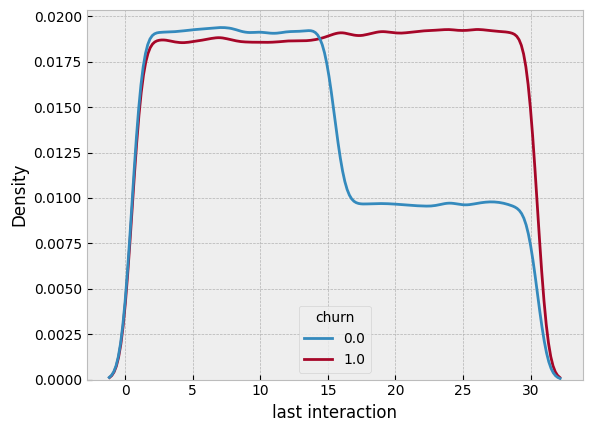

In [170]:
sns.kdeplot(x='last interaction',hue='churn',data=data)

In [171]:
data[data['churn']==1]['last interaction'].median()

np.float64(16.0)

In [172]:
data[data['churn']==0]['last interaction'].median()

np.float64(12.0)

In [173]:
last_interaction_churn=data[data['churn']==1]['last interaction'].sample(500,random_state=45)
not_last_interaction_churn=data[data['churn']==0]['last interaction'].sample(500,random_state=45)

Doing levenes test to check for variability

In [174]:
is_var_same(last_interaction_churn,not_last_interaction_churn)

Levene’s p-value: 0.01044
Not equal variance


Null Hypo : mean last interaction churn = mean last interaction not churn
Alternate Hypo : mean last interaction churn != mean last interaction not churn

Checking for 2 sample t test to get to know are there difference or not

In [176]:
stats,p=ttest_ind(np.array(last_interaction_churn),np.array(not_last_interaction_churn))
print(f"{p:.4f}")
if p<0.05:
    print('There is difference')
else:
    print('There is no difference')

0.0000
There is difference


If last interaction is more than 20 days then its most likely to say there are lesser chance of user to stay

# So what are the conclusions I am making?

1. Both the age group differs, checked by 2 sample t test...and by visualizing we can say that higher age people are more likely to churn than lower aged people...
so that means - do something to keep higher aged peoples engaged

2. There is more chance of male gender to stay...but cannot conclude anything for females, so to increase revenue, provider can add something more that will be liked by men

3. People using this service less than 10 times are more likely to churn...the more the usage the more the chance of staying

4. People calling more than 5 times are most probably to churn... provider can solve their problems in fewer calls, so that customers do not churn

5. People with more than 20 days of delay in payment is most likely to churn.

6. People spending more are not likely to churn.

7. If last interaction is more than 20 days, means the user more likely to churn.